# <font color='red'>SGD Algorithm to predict movie ratings</font>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


In [299]:
import pandas as pd
from sklearn.utils.extmath import randomized_svd
import numpy as np 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from scipy.sparse import csr_matrix
from sklearn.metrics import mean_squared_error



<font color='red'> Reading the csv file </font>

In [300]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/csv files/ratings_train.csv'
path1 = '/content/drive/My Drive/csv files/user_info.csv.txt'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [301]:
#loading the data
data = pd.read_csv(path)
user_info = pd.read_csv(path1)

data.head(5)

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [302]:
data.shape

(89992, 3)

In [303]:
N=(len(data['user_id'].unique()))
M=(len(data['item_id'].unique()))
print(N,M)


943 1662


<font color='red'>Create your adjacency matrix </font>

In [304]:
#creating a matrix with all zeroes
a_matrix = np.zeros(shape=(943,1681))
print(a_matrix)

#Filling the matrix  based on the rating weights from Ratings table
for ind in data.index:     
     rowNo=data['user_id'][ind]
     colNo=data['item_id'][ind]
     wt=data['rating'][ind]
     a_matrix[rowNo][colNo]=wt
print("--------After Filling it weights/ratings--------")
print(a_matrix)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
--------After Filling it weights/ratings--------
[[5. 0. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


In [305]:
#Testing the values in the matrix
print(a_matrix[772][36])
print(a_matrix[58][504])
print(a_matrix[372][1077])


3.0
5.0
4.0


In [306]:
#Generating the adjacency matrix from the a_matrix
adjacency_matrix = csr_matrix(a_matrix)   # Here's the initialization of the sparse matrix.
print(adjacency_matrix.shape)
print(adjacency_matrix)

(943, 1681)
  (0, 0)	5.0
  (0, 2)	4.0
  (0, 3)	3.0
  (0, 4)	3.0
  (0, 5)	5.0
  (0, 6)	4.0
  (0, 7)	1.0
  (0, 8)	5.0
  (0, 9)	3.0
  (0, 10)	2.0
  (0, 11)	5.0
  (0, 12)	5.0
  (0, 13)	5.0
  (0, 14)	5.0
  (0, 15)	5.0
  (0, 16)	3.0
  (0, 17)	4.0
  (0, 18)	5.0
  (0, 19)	4.0
  (0, 20)	1.0
  (0, 21)	4.0
  (0, 22)	4.0
  (0, 23)	3.0
  (0, 24)	4.0
  (0, 25)	3.0
  :	:
  (942, 720)	3.0
  (942, 722)	1.0
  (942, 730)	4.0
  (942, 737)	4.0
  (942, 761)	4.0
  (942, 763)	3.0
  (942, 783)	2.0
  (942, 792)	3.0
  (942, 806)	4.0
  (942, 814)	4.0
  (942, 822)	4.0
  (942, 823)	3.0
  (942, 829)	2.0
  (942, 838)	4.0
  (942, 926)	5.0
  (942, 939)	1.0
  (942, 941)	5.0
  (942, 1009)	2.0
  (942, 1042)	3.0
  (942, 1045)	2.0
  (942, 1065)	2.0
  (942, 1072)	4.0
  (942, 1186)	3.0
  (942, 1226)	3.0
  (942, 1328)	3.0


In [307]:
#assigning dimensions for b_i and c_j based on its adjacency matrix shape
N=943
M=1681

<font color='cyan'>Grader function - 1</font>

In [308]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

<font color='red'> SVD decompostion</font>

<font color='red'>Write your code for SVD decompostion</font>

In [309]:
# Using adjacency_matrix as matrix for SVD decompostion
# Using  n_components as 3 as my choice

U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=3,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)
print(Sigma)

(943, 3)
(3,)
(1681, 3)
[577.35728878 221.78450825 198.24306937]


<font color='red'>Compute mean of ratings</font>

In [310]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    ratings_mean = data["rating"].mean()
   
    return ratings_mean

In [311]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [312]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [313]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 

    vec= np.zeros(shape=(dim))
    # return output as a list of zeros   

    return vec

In [314]:
dim=N # give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)
print(b_i.shape)
print(b_i)

(943,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [315]:
dim=M # give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)
print(c_j.shape)
print(c_j)

(1681,)
[0. 0. 0. ... 0. 0. 0.]


<font color='cyan'>Grader function -3 </font>

In [316]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

<font color='red'>Compute dL/db_i</font>

In [317]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    db=2*alpha*(b_i[user_id])-2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],V[:,item_id].T))
    return db
     


<font color='cyan'>Grader function -4 </font>

In [318]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

In [319]:
def derivative_dc(user_id,item_id,rating,U,V,mu, alpha):
    '''In this function, we will compute dL/dc_j'''
    dc=2*alpha*(c_j[item_id])-2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],V[:,item_id].T))
    return dc
     


<font color='cyan'>Grader function - 5 </font>

In [320]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu,r)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [321]:
#Implementing the SGD to calculate the Mean Square error
def train(epochs,alpha,eta0):
    ''' In this function, we will implement SGD'''
    global MSE
    global ypred_ij
    # for every epoch
    for epoch in range(1,epochs+1):
        ypred_ij=[]
        MSE=[]

        # for each pair of (user, movie):
        for ind in data.index:
            #compute dL/db_i and dL/dc_j
            db=derivative_db(data['user_id'][ind],data['item_id'][ind],data['rating'][ind],U,VT,mu,alpha)
            dc=derivative_dc(data['user_id'][ind],data['item_id'][ind],data['rating'][ind],U,VT,mu,alpha)
            
             #update bias terms b and c
            b_i[data['user_id'][ind]]=b_i[data['user_id'][ind]]-eta0*db
            c_j[data['item_id'][ind]]=c_j[data['item_id'][ind]]-eta0*dc

            # predict the ratings
            ypred=(mu+b_i[data['user_id'][ind]]+c_j[data['item_id'][ind]]+np.dot(U[data['user_id'][ind]],VT[:,data['item_id'][ind]].T))
            ypred_ij.append(ypred)
            mean_Sqerror=np.square(data['rating'][ind]-ypred)
            #mserror=mean_squared_error(data['rating'][ind], ypred, squared=True)
            MSE.append(mean_Sqerror)  




           

In [322]:
#Calling the train() do retreive MSE and Ypred
eta0=0.0001
epochs=50

#with alpha, eta0 ,N,epochs and dataset let's call the method train()
train(epochs,alpha,eta0)


In [323]:
print("----printing 100 values of MSE and Its Predicted Ratings-----")
print("==========================================================")
print("    MSE                     ||        Predicted Rating")
print("==========================================================")
for ind in range(100):
    print("   ",MSE[ind],"               ",ypred_ij[ind])


----printing 100 values of MSE and Its Predicted Ratings-----
    MSE                     ||        Predicted Rating
    0.0498082816370952                 3.223177690724443
    1.2347732968430503                 3.888796464709075
    0.13063549424697113                 3.63856467487672
    0.12864723166098718                 3.6413257304168765
    0.9229036412910269                 4.039321260102511
    2.6654086391483913                 3.367392074272457
    0.0012907916201136528                 3.964072411434753
    0.017217738715209013                 3.868783618723846
    1.6353718710823921                 3.721183409912746
    0.05484316498557987                 2.765813824093778
    3.6472185358073626e-06                 2.998090230763729
    0.00015043745320660076                 4.012265294664483
    0.7464193238533736                 3.1360443739095314
    0.04757647242878637                 3.2181203164053875
    0.00234685063518899                 3.048444304465943
    0.05

<br>

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

In [324]:
print("Printing our Computed User Feautures")
print(U)
#scaling the Matrix
abs_max = np.amax(np.abs(U))
U_scaled = U * (4.0 / abs_max)
print("--------------scaled----------------------")
print(U_scaled)


Printing our Computed User Feautures
[[ 0.0662257   0.00788899 -0.0125315 ]
 [ 0.01364432 -0.04889509  0.05655433]
 [ 0.00543826 -0.02512771  0.02002764]
 ...
 [ 0.00738924 -0.02597382  0.00634306]
 [ 0.02499924  0.00447781  0.02605724]
 [ 0.04337341 -0.00281535 -0.06077691]]
--------------scaled----------------------
[[ 2.04292034  0.24335824 -0.38656983]
 [ 0.42089782 -1.5083084   1.74457945]
 [ 0.16775865 -0.77513587  0.61780949]
 ...
 [ 0.22794226 -0.80123652  0.19566971]
 [ 0.77117269  0.13813072  0.80380961]
 [ 1.33797634 -0.08684751 -1.87483668]]


In [325]:
print("-------User Info Table-------------")
print(user_info.head(5))


-------User Info Table-------------
   user_id  age  is_male  orig_user_id
0        0   24        1             1
1        1   53        0             2
2        2   23        1             3
3        3   24        1             4
4        4   33        0             5


In [326]:
#checking the number of unique values in is_Male column
print(user_info['is_male'].value_counts())


1    670
0    273
Name: is_male, dtype: int64


In [327]:
#separating the Is_male column from the UserInfo Table and dropping it
is_male_list=[]

is_male_list = user_info['is_male'].values
user_info.drop('is_male', axis='columns', inplace=True)

print(len(is_male_list))
print(is_male_list)

943
[1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1
 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1
 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 1 1 1 0 0 

In [328]:
#Building the Model with Logistic Regression,Binary classification to predict the User is Male or Not
clf = LogisticRegression(random_state=0).fit(user_info, is_male_list)

#Testing,how good our predicted User matrix U from SVD can predict the Movie Ratings
is_male_pred=clf.predict(U_scaled)

# Retreiving the all required TN,Fp,FN,Tp from the confusion Matrix
tn, fp, fn, tp = confusion_matrix(is_male_list,is_male_pred ).ravel()
print(tn, fp, fn, tp)

confusion_matrix(is_male_list, is_male_pred)


0 273 0 670


array([[  0, 273],
       [  0, 670]])

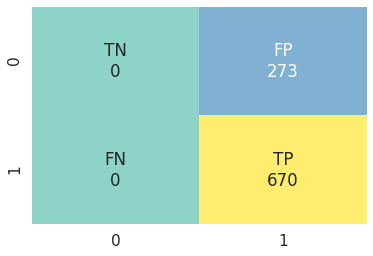

In [329]:
#Plotting the ConfusionMatrix 
confusion_matrix_IsMale= confusion_matrix(is_male_list, is_male_pred)

# Representing Confusion Matrix in HeatMaps-https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_IsMale.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_IsMale, annot=labels,cbar=False, fmt='',cmap='Set3')

**Observations**:

1)In this Binary Classification,all the Negatives are showing up as Positives only.

2)All the True Negatives showed up as False Positives

3)The data regarding Positives is predicted Properly

 But,Since there is improper prediction as atleast 1 neagtive is not shown,So our predicted UserMatrix is not predicting the Is_Male 